# Bussiness Understanding
A continuación, se analizara el caso  weatherAUS  el que hace referencia al estudio del clima en Australia dentro del periodo de 2008 y 2017.
Con este notebook, lo que buscamos es analizar el registro de datos de la muestra y realizar un análisis a fondo de estos con el fin de sacar conclusiones, comparaciones y/o predicciones acerca del clima en Australia.
Las caracteristicas que tenemos son:
   * Date           --> Fecha del registro
   * Location       --> Ubicación(Ciudad)
   * MinTemp        --> Temperatura minima registrada en grados Celsius
   * MaxTemp        --> Temperatura maxima registrada en grados Celsius
   * Rainfall       --> Cantidad de agua registrada por la lluvia en mm
   * Evaporation    --> Evaporación registrada durante las 24hr en mm
   * Sunshine       --> Horas que el sol brilló durante el día
   * WindGustDir    --> Dirección del viento
   * WindGustSpeed  --> Velocidad del viento en Km
   * WindDir9am     --> Dirección del viento registrada  a las 9am
   * WindDir3pm     --> Dirección del viento registrada  a las 3pm
   * WindSpeed9am   --> Velocidad del viento registrada a las 9am en Km
   * WindSpeed3pm   --> Velocidad del viento registrada  a las 3pm en Km
   * Humidity9am    --> Porcentaje de humedad registrada a las 9 am
   * Humidity3pm    --> Porcentaje de humedad registrada a las 3 pm
   * Pressure9am    --> Presión atmosferica a las 9am
   * Pressure3pm    --> Presión atmosferica a las 3pm
   * Cloud9am       --> Cantidad de cielo cubierto por nubes a las 9am, en fracciones(0=despejado, 8=totalmente nublado)
   * Cloud3pm       --> Cantidad de cielo cubierto por nubes a las 3pm, en fracciones(0=despejado, 8=totalmente nublado)
   * Temp9am        --> Temperatura en grados celsius a las 9am
   * Temp3pm        --> Temperatura en grados celsius a las 3pm
   * RainToday      --> Llueve hoy? (si - no)
   * RISK_MM        --> Cantidad de lluvia
   * RainTomorrow   --> Llueve mañana? (si - no)
    

# Data Understanding
En esta fase se dará inicio a la carga de los datos para poder explorarla y obtener un mayor entendimiento de esta.
Obtendremos información relevante como la cantidad de filas, columnas, tipo de datos, medidas de centralidad, entre otras medidas importantes.

In [1]:
#importamos librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Cargamos la data del csv
data_frame = pd.read_csv ("weatherAUS.csv")
data_frame.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
data_frame.shape

(142193, 24)

La muestra de datos utilizada tiene 142.193 filas y 24 columnas.
Estos datos están centrados en los registros metereologicos de Australia.

In [4]:
data_frame.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Dentro de la muestra de datos podemos encontrar 7 features de tipo objeto y 17 de tipo float,


In [5]:
data_frame.describe(include="all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2017-06-14,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


Aquí podemos destacar que:
* El registro máximo de la máxima temperatura tuvo una diferencia de 15 grados con la máxima mínima temperatura registrada, y un escalado progresivo hasta el 75% en ambas(MinTemp y MaxTemp), luego desde ahí y hasta las máximas, practicamente se duplican las temperaturas pasando de 16 a 33 en la mínima y de 28 a 48 en la máxima.
* La velocidad del viento tambien tiene un gran salto desde el 75% hasta la máxima registrada, pasando de 45Km (75%) a 135Km (Max)
* Se puede ver tambien que las variables RainToday y RainTomorrow, al igual que las direcciones del viento (WindGustDir, WinDir9am y WindDir3pm) son string categoricas, por ende para el modelo tendremos que convertirlos a numericas.

In [6]:
#Conteo de datos por ciudad ↓↓
data_frame.groupby("Location").count()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,3090,3088,3088,3020,1649,1698,3067,3067,2831,3075,...,3085,3082,3083,0,0,3085,3086,3020,3090,3090
Albany,3016,2957,2984,2996,2736,2510,0,0,2772,2249,...,2316,2991,2992,2981,2321,2980,2320,2996,3016,3016
Albury,3011,3005,3010,2991,0,0,3001,3001,2494,2969,...,3007,3011,3007,1282,1415,3007,3007,2991,3011,3011
AliceSprings,3031,3030,3030,3025,2820,2520,2981,2981,2801,3027,...,3026,3030,3028,2699,2673,3031,3029,3025,3031,3031
BadgerysCreek,2928,2916,2925,2877,0,0,2912,2912,2533,2868,...,2897,2785,2780,0,0,2912,2908,2877,2928,2928
Ballarat,3028,3027,3027,3017,0,0,3004,3004,2937,3012,...,3022,3004,3004,2484,1987,3016,3023,3017,3028,3028
Bendigo,3034,3033,3033,3030,1185,0,2998,2999,2791,2992,...,3033,3020,3025,2070,2267,3032,3033,3030,3034,3034
Brisbane,3161,3155,3157,3132,3142,3113,3146,3146,3092,3134,...,3152,3161,3159,3160,3159,3159,3152,3132,3161,3161
Cairns,2988,2987,2988,2964,2647,2562,2970,2971,2946,2984,...,2988,2988,2988,2803,2782,2988,2988,2964,2988,2988


Se puede ver que hay entre 2500 y 3400 registros por cada ciudad, destacando a Canberra como la ciudad con más registros climáticos y a Uluru como la ciudad con menos registros.

---

# Data Preparation 
La fase de preparación de datos cubre todas las actividades necesarias para construir el conjunto final de datos (los datos que se utilizarán en las herramientas de modelado) a partir de los datos en bruto iniciales. 
Las tareas incluyen la selección de tablas, registros y atributos, así como la transformación y la limpieza de datos nulos para el posterior proceso de modelado.

Procederemos a continuación a revisar los valores nulos de nuestra data

In [3]:
#ver los nulos 
data_frame.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Se puede apreciar que hay muchos datos nulos dentro de nuestra data, por lo cual la mejor acción en este caso sería modificarlos por algún valor medio como la moda o el promedio, de esta manera la data general no se verá afectada y los resultados finales serán mucho más precisos y "reales" que si eliminaramos dichos valores nulos que corresponden casi a un 10% de la data aproximadamente. 

In [4]:
# Completando valores faltantes datos cuantititavos
# Agrupación de las columnas por tipo de datos
tipos = data_frame.columns.to_series().groupby(data_frame.dtypes).groups
# Conociendo la lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext) # cantidad de columnas con datos categóricos.

7

Primero veremos cuantos datos son cuantitativos y cuantos son numeros dentro de la data, considerando que:

* Variables categóricas:
    Las variables categóricas también se denominan variables cualitativas o variables de atributos. Los valores de una variable categórica son categorías o grupos mutuamente excluyentes. Los datos categóricos pueden tener o no tener un orden lógico. 
* Variables cuantitativas:
    Los valores de una variable cuantitativa son números que suelen representar un contro o una medición. 

In [5]:
# Conociendo la lista de columnas numéricas
columnas = data_frame.columns
cnum = list(set(columnas) - set(ctext))
len(cnum)


17

In [6]:
# Completando valores faltantes datos cuantititavos
for columna in cnum:
  mean = data_frame[columna].mean()
  data_frame[columna] = data_frame[columna].fillna(mean)

Procederemos a cambiar los valores nulos por el promedio que es más "exacto", a diferencía de la moda o la mediana que pueden tener pequeñas variaciones que si bien dependiendo del caso pueden ser casi nulas, en mi caso prefiero usar el promedio para mantener una mayor estabilidad en la data.

In [7]:
# Completando valores faltantes datos categóricos
for columna in ctext:
  mode = data_frame[columna].mode()[0]
  data_frame[columna] = data_frame[columna].fillna(mode) 

Una vez ya reemplazado los datos nulos, haremos una comprobación para verificar que todo esté correcto

In [8]:
#ver los nulos 
data_frame.isnull().any().any()

False

In [9]:
for feature in data_frame.columns:
  print('Total de valores nulos de', feature,'=', data_frame[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 0
Total de valores nulos de MaxTemp = 0
Total de valores nulos de Rainfall = 0
Total de valores nulos de Evaporation = 0
Total de valores nulos de Sunshine = 0
Total de valores nulos de WindGustDir = 0
Total de valores nulos de WindGustSpeed = 0
Total de valores nulos de WindDir9am = 0
Total de valores nulos de WindDir3pm = 0
Total de valores nulos de WindSpeed9am = 0
Total de valores nulos de WindSpeed3pm = 0
Total de valores nulos de Humidity9am = 0
Total de valores nulos de Humidity3pm = 0
Total de valores nulos de Pressure9am = 0
Total de valores nulos de Pressure3pm = 0
Total de valores nulos de Cloud9am = 0
Total de valores nulos de Cloud3pm = 0
Total de valores nulos de Temp9am = 0
Total de valores nulos de Temp3pm = 0
Total de valores nulos de RainToday = 0
Total de valores nulos de RISK_MM = 0
Total de valores nulos de RainTomorrow = 0


Con esos resultados se puede apreciar que ya no hay nulos en nuestra data

---
A continuación Generaremos un nuevo csv que no contendrá nulos, de esta manera podrémos continuar el analisís y tratamiento de la data sin estos valores, o más bien con dichos valores, pero modificados para no afectar la data.

In [10]:
data_frame.to_csv("weather_procesado.csv", index=False)

---

In [11]:
#Cargamos el csv nuevo para utilizarlo
dt_procesado = pd.read_csv("weather_procesado.csv")
dt_procesado.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No


In [16]:
#Obtengo la máxima minima temperatura
min_temp = dt_procesado['MinTemp'].max()
#Obtengo el promedio de la máxima temperatura
avg_maxTemp = dt_procesado['MaxTemp'].mean()
datat = dt_procesado[dt_procesado.MaxTemp > avg_maxTemp].groupby('Location').count()
datat.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,...,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308
Albany,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
Albury,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,...,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360
AliceSprings,2246,2246,2246,2246,2246,2246,2246,2246,2246,2246,...,2246,2246,2246,2246,2246,2246,2246,2246,2246,2246
BadgerysCreek,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,...,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464


Se aprecia que la cantidad de registros por ciudad que superan el promedio de temperatura máxima es casi la mitad del conteo inicial agrupado por ciudad que hicimos, lo que quiere decir que casi la mitad de la data no supera el promedio de la máxima temperatura.

In [17]:
#Temperaturas maximas por ciudad en 2008
tmp_max_2008 = dt_procesado[(dt_procesado.Date.str.contains('2008'))].groupby(['Location'], as_index=False)['MaxTemp'].max()
tmp_max_2008

,Location,MaxTemp
0,Adelaide,36.6
1,Albany,27.7
2,Albury,33.9
3,AliceSprings,40.9
4,Ballarat,32.2
5,Bendigo,35.0
6,Brisbane,35.1
7,Cairns,34.1
8,Canberra,35.8
9,Darwin,37.5


Obtuvimos la temperatura máxima obtenida por cada ciudad en el año 2008 y se destaca que:
* En la tabla vemos que en 2008 no estuvieron presentes todas las ciudades, solo hay 22 con registros de las 49 ciudades que hay en total registradas.
* La ciudad con la mayor máxima temperatura en ese año fué AliceSprings con 40,9 grados celsius
* La ciudad con la menor Máxima temperatura en ese año fué MountGinini con 22,0 grados celsius

In [18]:
#Temperaturas maximas por ciudad en 2017
tmp_max_2017 = dt_procesado[(dt_procesado.Date.str.contains('2017'))].groupby(['Location'], as_index=False)['MaxTemp'].max()
tmp_max_2017

,Location,MaxTemp
0,Adelaide,42.4
1,Albany,35.9
2,Albury,43.7
3,AliceSprings,41.9
4,BadgerysCreek,46.4
5,Ballarat,40.1
6,Bendigo,41.6
7,Brisbane,37.6
8,Cairns,36.2
9,Canberra,41.6


Obtuvimos la temperatura máxima obtenida por cada ciudad en el año 2017 y se destaca que:
* En la tabla vemos que en 2017 estuvieron presentes 48 ciudades de las 49 registradas en total.
* La ciudad con la mayor máxima temperatura en ese año fué Moree con 47,3 grados celsius
* La ciudad con la menor Máxima temperatura en ese año fué NorfolkIsland con 27,9 grados celsius

---
A continuación, procederemos a realizar una comparación de las temperaturas máximas alcanzadas por las ciudades de australia entre el menor y el mayor año de la data (2008 - 2017)

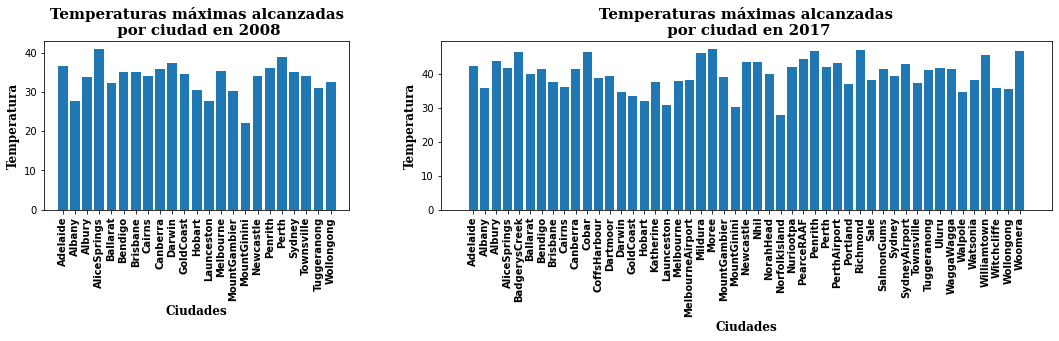

In [20]:
from matplotlib import gridspec
fig  = plt.figure()
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[2, 4])
fonttl = {'family': 'serif', 'weight': 'bold', 'size': 15,}
fontlb = {'family': 'serif', 'weight': 'bold', 'size': 12,}
fonticks = {'weight': 'bold', 'size': 10,}

#Graficando data invierno 2008
x_values1 = tmp_max_2008['Location']
y_values1 = tmp_max_2008['MaxTemp']
ax0 = fig.add_subplot(spec[0])
plt.bar(x_values1, y_values1)
plt.title('Temperaturas máximas alcanzadas\n por ciudad en 2008', fontdict=fonttl)
ax0.set_xticks(x_values1)
ax0.set_xticklabels(x_values1, rotation=90,fontdict=fonticks)
ax0.set_xlabel('Ciudades',fontdict=fontlb)
ax0.set_ylabel('Temperatura',fontdict=fontlb)

#Graficando data invierno 2017
x_values2 = tmp_max_2017['Location']
y_values2 = tmp_max_2017['MaxTemp']
ax1 = fig.add_subplot(spec[1])
plt.bar(x_values2, y_values2)
plt.title('Temperaturas máximas alcanzadas\n por ciudad en 2017', fontdict=fonttl)
ax1.set_xticks(x_values2)
ax1.set_xticklabels(x_values2, rotation=90,fontdict=fonticks)
ax1.set_xlabel('Ciudades',fontdict=fontlb)
ax1.set_ylabel('Temperatura',fontdict=fontlb)

plt.subplots_adjust(wspace=0.2, bottom=0.1, left=0.2)
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

Teniendo en cuenta la data anterior mostrada, realizamos una comparación de temperaturas máximas alcanzadas por ciudad entre 2008 y 2017 y se destaca que:
* La mayor máxima temperatura obtenida en 2008 fué 7 grados más baja que el 2017, al igual que la minima máxima temperatura en 2008 fué 5 grados más baja que en 2017.
* Apreciando el grafico nos damos cuenta de que en 2017 hay varias ciudades en las que  la máxima temperatura obtenida supera los 40 grados.
* Las mínimas máximas temperaturas obtenidas en 2017 están cercanas a los 30 grados, mientras que en 2008 eran más cercanas a los 20 grados.
* Con todo esto nos podemos dar cuenta de como a ido cambiando el clima entre el año 2008 y 2017, aumentando las temperaturas hasta en aproximadamente 8 grados celsius por ciudad.

In [21]:
#Data filtrada por fecha(invierno 2008) y máxima cantidad de lluvia
invierno_2008 = dt_procesado[(dt_procesado['Date'] >= '2008-06-01') & (dt_procesado['Date'] 
<= '2008-08-31')].groupby('Location')['Rainfall'].max()
#Data filtrada por fecha(invierno 2017) y máxima cantidad de lluvia 
invierno_2017 = dt_procesado[(dt_procesado['Date'] >= '2017-06-01') & (dt_procesado['Date'] 
<= '2017-08-31')].groupby('Location')['Rainfall'].max()
#Convertimos las series a dataframe
dt_invierno_2008 = invierno_2008.to_frame()
dt_invierno_2017 = invierno_2017.to_frame()
#Unimos el dataframe del 2008 con el del 2017
dt_comparative = dt_invierno_2008.merge(dt_invierno_2017,how='outer',left_index=True,right_index=True,suffixes=("_left","_right"))
#Le ajustamos los nombres a las columnas
dt_comparative.rename(columns={'Rainfall_left':'Rainfall_2008','Rainfall_right':'Rainfall_2017'}).dropna()

,Rainfall_2008,Rainfall_2017
Location,,
Adelaide,22.0,1.4
Brisbane,24.2,24.8
Canberra,19.2,0.4
Darwin,0.0,0.0
Hobart,16.2,2.6
Melbourne,14.0,6.4
Perth,30.6,61.2
Sydney,46.4,61.0


En la anterior tabla podemos apreciar una comparación de la cantidad máxima de lluvia registrada por ciudad entre las ciudades de australia en 2008 - 2017 y se destaca que:
* En Perth podemos apreciar una diferencia bastante grande entre la máxima agua caida en 2008 y 2017, llegando practicamente a duplicarse y pasar de 30,6mm en 2008 a 61,2mm en 2017
* En canberra podemos ver que sucede al reves, pasando de 19,2mm de agua como máxima en 2008 a 0,4mm en 2017
* Como anomalía podemos destacar a Darwin, ciudad que registra 0,0mm en 2008 y 2017, bastante extraño

---

#### Transformamos las variables (Si y No) a númericas

In [22]:
#Importamos las librerias necesarias
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_squared_error

In [23]:
encoder=LabelEncoder()
dt_procesado['WindGustDir']=encoder.fit_transform(dt_procesado.WindGustDir.values)
dt_procesado['WindDir9am']=encoder.fit_transform(dt_procesado.WindDir9am.values)
dt_procesado['WindDir3pm']=encoder.fit_transform(dt_procesado.WindDir3pm.values)
new_df = dt_procesado

En este caso preferí usar LabelEncoder antes que OneHotEncoder ya que trabaja mejor con más categorias y no me crea tantas columnas por cada una como lo hace OHE y al ser las direcciones del viento (WindGustDir y sus variantes, WindDir9am y WindDir3pm) exactamente 16 categorias u opciones, la consideré mejor opción en este caso.

In [24]:
#Definimos las variables a utilizar
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['RainTomorrow','RainToday'])],remainder='passthrough')
X_data = np.array(ct.fit_transform(new_df))
#Definimos los nombre de las columnas
columnas = ["RainTomorrow_Yes","RainToday_Yes","Date","Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RISK_MM"]
#Los asignamos en un nuevo df
new_dt = pd.DataFrame(X_data, columns=columnas)

Usamos OneHotEncoder para convertir las features categoricas en numericas, de esta manera podremos aplicar diferentes modelos para poder predecir data, los datos se representarán con 1 y 0, ejemplo:
* RainTomorrow = Llueve mañana?, si la respuesta es SI, será equivalente a 1
* RainTomorrow = Llueve mañana?, si la respuesta es NO, será equivalente a 0
* RainToday = Llueve hoy?, si la respuesta es SI, será equivalente a 1
* RainToday = Llueve hoy?, si la respuesta es SI, será equivalente a 0

#### Eliminación de outliers

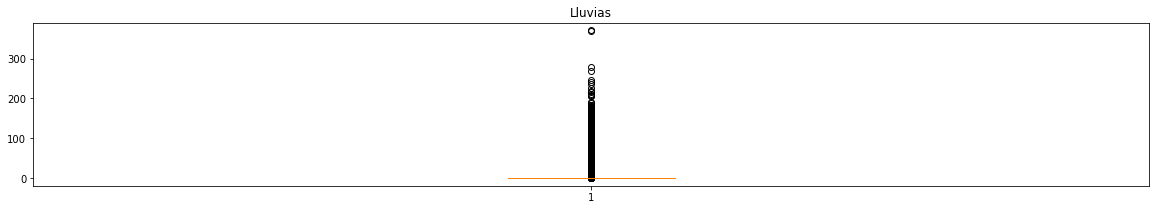

------
Valor máximo Rainfall  371.0
Valor mínimo Rainfall  0.0
Promedio Rainfall  2.349974074311172
Total datos Rainfall  142193
Cantidad de valores sobre 20mm en Rainfall  =  4013


In [26]:
rainfall = new_dt['Rainfall']
plt.boxplot(list(new_dt['Rainfall']))
plt.title('Lluvias')
plt.show()
mean_rain = new_dt['Rainfall'].mean()
maxRain = new_dt['Rainfall'].max()
minRain = new_dt['Rainfall'].min()
mas_20 = rainfall[(rainfall >=20)].count()
print("------")
print("Valor máximo Rainfall ",maxRain)
print("Valor mínimo Rainfall ",minRain)
print("Promedio Rainfall ",mean_rain)
print("Total datos Rainfall ", new_dt['Rainfall'].count())
print("Cantidad de valores sobre 20mm en Rainfall  = ", mas_20)

Se puede apreciar que el promedio de Rainfall es 2.34 y en el grafico vemos que la linea que demarca esto está muy por debajo, dejando muchos outliers, por lo cual procederemos a ir revisando la cantidad de datos outliers y en que medida podemos quitarlos sin afectar la data global ya que son muchos los valores fuera del margen.

In [27]:
maxRain = new_dt['Rainfall'].max()
minRain = new_dt['Rainfall'].min()
mas_300 = rainfall[(rainfall >=300)].count()
mas_200 = rainfall[(rainfall >=200)].count()
mas_100 = rainfall[(rainfall >=100)].count()
mas_50 = rainfall[(rainfall >=50)].count()
mas_20 = rainfall[(rainfall >=20)].count()
print("-------------------------------")
print("Cantidad de valores sobre 300mm en Rainfall = ", mas_300)
print("Cantidad de valores sobre 200mm en Rainfall = ", mas_200)
print("Cantidad de valores sobre 100mm en Rainfall = ", mas_100)
print("Cantidad de valores sobre 50mm en Rainfall  = ", mas_50)
print("Cantidad de valores sobre 20mm en Rainfall  = ", mas_20)

-------------------------------
Cantidad de valores sobre 300mm en Rainfall =  2
Cantidad de valores sobre 200mm en Rainfall =  14
Cantidad de valores sobre 100mm en Rainfall =  150
Cantidad de valores sobre 50mm en Rainfall  =  795
Cantidad de valores sobre 20mm en Rainfall  =  4013


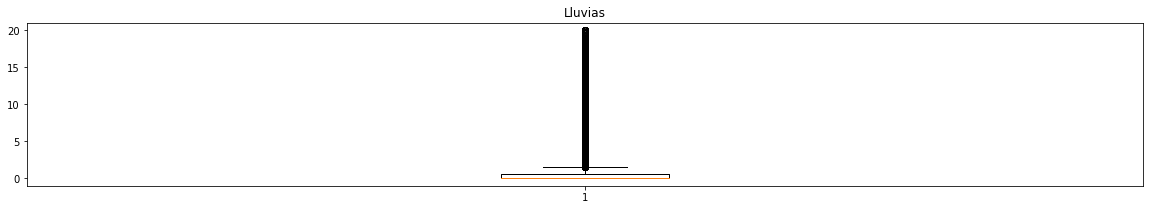

In [28]:
new_dt = new_dt[(new_dt.Rainfall <=20)]
plt.boxplot(list(new_dt['Rainfall']))
plt.title('Lluvias')
plt.show()

Mantenemos solo la data con un rainfall menor a 50mm, de esta manera dejamos solo la data principal y descartamos outliers para poder tener mejores modelos

#### Definimos x e y para los modelos
Aquí definiremos x e y usando la data del "new_dt" creado anteriormente, el cuál ya no contiene variables categoricas string (Si - No), ahora en su defecto y gracias a OneHotEncoder, estas variables son númericas (1 - 0), por lo tanto se podrán usar sin problemas en los modelos.

In [29]:
X_data = new_dt.drop(["Date","Location","RISK_MM"],axis=1)
X = new_dt.drop(["RainTomorrow_Yes","Date","Location"],axis=1)
y = new_dt['RainTomorrow_Yes']
y = y.astype('int')

---

# Modeling

A continuación, procederemos a aplicar tecnicas de mineria de datos con el fin de crear un modelo acorde a nuestro objetivo.
En este proceso podríamos encontrarnos con el hecho de tener que retomar ciertos datos y volver a afinarlos(data preparation) para poder continuar con el modeling de una manera más acertada.

L:\Entornos-de-desarrollo\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

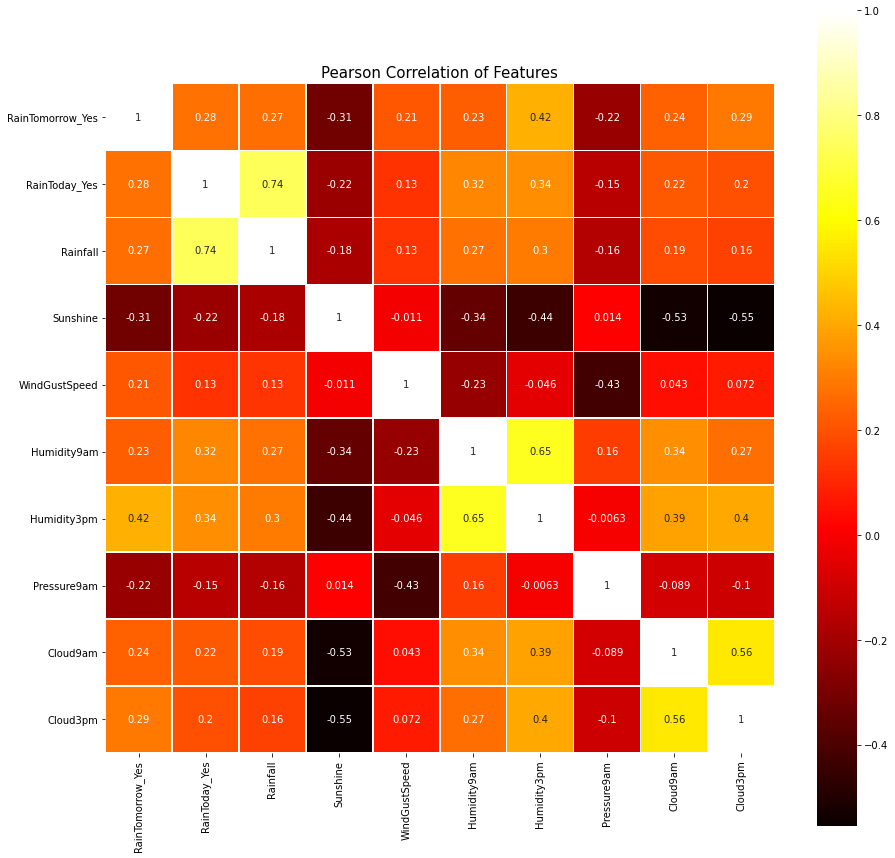

In [30]:
# Correlación de las variables
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k=10)
X_new = best.fit_transform(X_data, y)
X_new.shape
selected = best.get_support(indices=True)
#Mapeamos las features seleccionadas por el algoritmo dentro de un grafico de correlación
used_features =X_data.columns[selected]
colormap = plt.cm.hot
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
sb.heatmap(new_dt[used_features].astype(float).corr(),linewidths=0.3,vmax=1, square=True, cmap=colormap, linecolor='white', annot=True)

Podemos ver en la grafica, que las 4 variables con mayor correlación a "RainTomorrow_Yes" son:
* RISK_MM con un puntaje de 0.5
* Humidity3pm con un 0.44
* Sunshine con un 0.33
* RainToday_Yes con un 0.31

### El primer modelo que aplicaremos será el de Regresión logistica
Usaremos este modelo como la primera opción por su facilidad para trabajar con clasificaciones y categorias, como en este caso se busca predecir si lloverá mañana (Si - No) = (1 - 0), es una de las mejores opciones.

In [89]:
X_lr = new_dt[['Sunshine','Rainfall','Humidity9am','Humidity3pm','RainToday_Yes']]
#Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y, test_size=0.25,random_state = 29)
#Seleccionamos y creamos el modelo
model_lr = linear_model.LogisticRegression()
#Lo ajustamos a los datos
model_lr.fit(X_lr_train,y_lr_train)
#Predecimos
y_lr_pred = model_lr.predict(X_lr_test)

Las variables que utilizaremos para el modelo final serán: "Sunshine", "Rainfall", "Humidity3pm", "Humidity9am" y "RainToday_Yes", esto porque:
* Son las que más preponderancia tienen sobre el modelo y las predicciones.
* Como anomalia, he de destacar que si bien según la grafica, la variable "Cloud3pm" tiene 0.30, un puntaje mayor que el de "Rainfall" (0.24), al utilizar "cloud3pm" para el modelo, la precisión de este y el porcentaje de predict se ven afectados de manera casi nula, teniendo una mejora de 0,0020 aprox, al igual que al usar "RainToday_Yes" que es el 4to con mejor puntaje, tambien se ve afectado de manera nula el modelo, en cambio "Rainfall", aún teniendo menor puntaje, sube la precisión del modelo y las predict mejoran.
* Por otro lado y como mencionamos antes de la grafica, no utilizaremos la variable RISK_MM aquí, esto debido a que dentro del modelo de regresión logistica, este tiene mucha preponderancia y las predict se ven afectadas en practicamente un 100%., por lo cuál la descartaremos para este modelo ya que als predict perdían sentido.

### El segundo modelo que aplicaremos será el de Naive Bayes

In [90]:
#Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 29)
#Define el algoritmo del modelo a utilizar, Naive Bayes
modelo_nb = GaussianNB()
#Entrenamos el modelo
modelo_nb.fit(X_train, y_train)
#Validación del modelo
y_nb_pred = modelo_nb.predict(X_test)

Para este modelo tomaremos solo las variables definidas en x e y al inicio, que son practicamente todas, descartando solo las no númericas como Date, Location, WindGustDir, etc.

### El tercer modelo que aplicaremos será el arbol de regresión

In [91]:
x2 = new_dt[['Sunshine','Rainfall','Humidity9am','Humidity3pm','WindGustSpeed','Pressure3pm']]
y2 = new_dt [['RainTomorrow_Yes'] ]
# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
x_dtr_train, x_dtr_test, y_dtr_train, y_dtr_test = train_test_split(x2, y2, test_size=0.2, random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)
# Entrenamiento del modelo
modelo.fit(x_dtr_train, y_dtr_train)
# Validación del modelo
Y_pred = modelo.predict(x_dtr_test)

A diferencia del modelo de regresión logistica, en este no se ve la misma preponderancia de las variables como lo fué en los anteriores modelos, se experimentó con todas las variables, llegando incluso a descubrir que algunas reducen el indice de precisión del modelo, por ende se descartaron y solo se mantuvieron las que tenían mayor importancia en este.

Profundidad del árbol: 5
Número de nodos terminales: 32


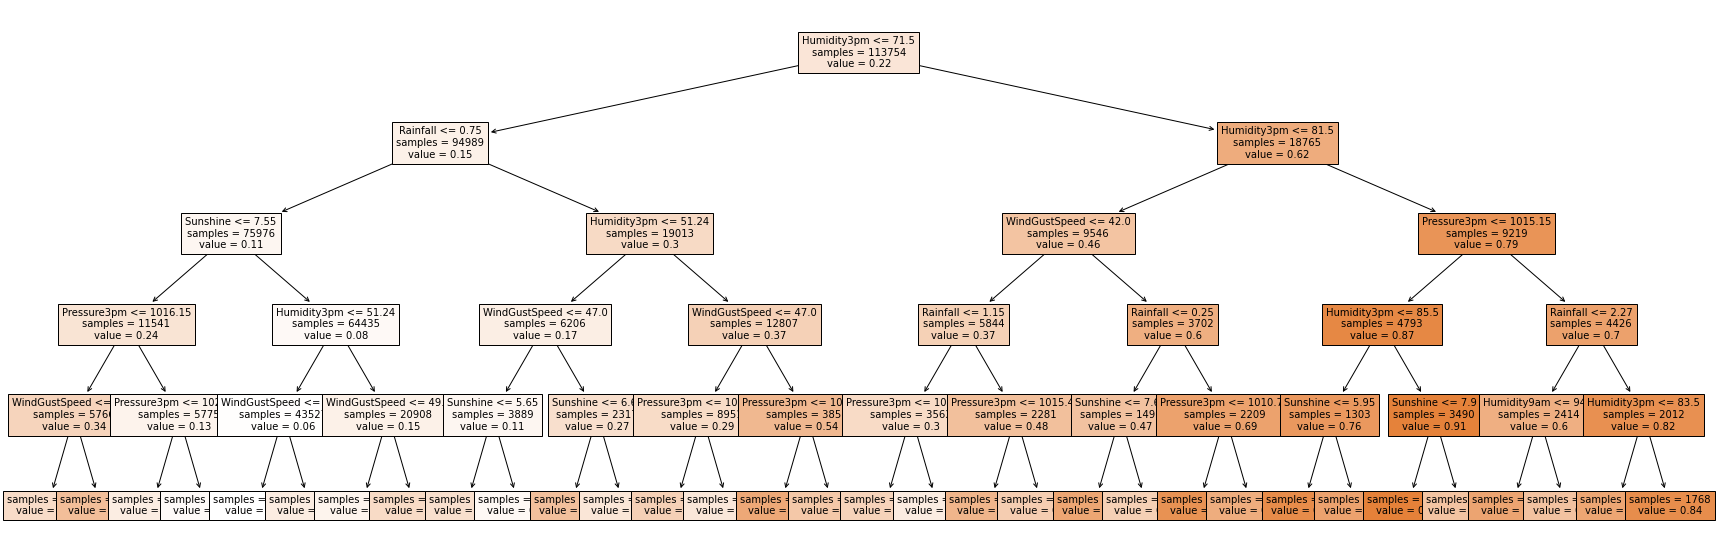

In [92]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
decision_tree = modelo,
feature_names = x2.columns,
class_names = 'RainTomorrow_Yes',
filled = True,
impurity = False,
fontsize = 10,
precision = 2,
ax = ax
)

---

# Evaluation
En esta sección procedemos a evaluar los modelo creados anteriormente mediante el uso de la matriz de confusión y otras métricas,es aquí tambien donde aplicaremos mejoras de ser posible.

### Evaluación del Modelo regresión logistica

In [93]:
#Se evalua el modelo
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_lr_test, y_lr_pred)
print('Matriz de Confusión:')
print(matriz)
#Se calcula la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_lr_test, y_lr_pred)
print('Precisión del modelo:', precision)
accuracy = accuracy_score(y_lr_test, y_lr_pred)
print('Accuracy del modelo:',accuracy)
print('F1 score del modelo:',f1_score(y_lr_test, y_lr_pred))
print('Recall del modelo:',recall_score(y_lr_test, y_lr_pred))

Matriz de Confusión:
[[26152  1384]
 [ 4757  3256]]
Precisión del modelo: 0.7017241379310345
Accuracy del modelo: 0.8272525246842387
F1 score del modelo: 0.5146605548091362
Recall del modelo: 0.406339697990765


Se aprecia que según la matriz de confusión, el modelo de regresión logistica destaca por:
* Predecir correctamente 26.152 negativos (No lloverá mañana = 0)
* Predecir correctamente 3256 positivos (Si lloverá mañana = 1)
* 4757 falso negativo y 1384 falsos positivos
* Tiene una precisión del 0.70 (70%) lo cual no está mal porque viene acompañado de un accuracy de 0.82, por lo cual tiene una exactitud bastante decente.
* Y el Recall es de 0.40, lo que termina de dejarnos claros que el modelo no es malo, pero tiene mucha menos probabilidad de acertar si lloverá o no mañana, que el modelo siguiente que es el de Naive Bayes.

### Evaluación del Modelo Naive Bayes

In [94]:
#Se evalua el modelo
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_nb_pred)
print('Matriz de Confusión:')
print(matriz)
#Se calcula la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_nb_pred)
print('Precisión del modelo:', precision)
accuracy = accuracy_score(y_test, y_nb_pred)
print('Accuracy del modelo:',accuracy)
print('F1 score del modelo:',f1_score(y_test, y_nb_pred))
print('Recall del modelo:',recall_score(y_test, y_nb_pred))
print("MSE: %.2f" % mean_squared_error(y_nb_pred, y_test))

Matriz de Confusión:
[[25846  1690]
 [    1  8012]]
Precisión del modelo: 0.8258091115233972
Accuracy del modelo: 0.9524318546231961
F1 score del modelo: 0.9045441716059837
Recall del modelo: 0.9998752027954574
MSE: 0.05


Se puede apreciar en la matriz de confusión, que el modelo creado es bueno, ya que del 25% que se utilizó en la muestra, se destaca que:
* Predijo correctamente 25.876 negativos (No llovera mañana = 0)
* Predijo correctamente 8.012 positivos (Si llovera mañana = 1)
* Tuvo apenas 1 falso negativo y 1660 falsos positivos
* Tiene una precisión del 0.82 (82%)
* Se puede mejorar.
* Tiene un Recall de 0.99, lo cuál nos indíca que tiene un porcentaje bastante alto de identificar, si lloverá mañana o no lo hará.
* Y el F1 y el accuracy están sobre el 90, lo cual nos hace notar nuevamente que el modelo es bastante exacto.
* Podemos ver tambien que el MSE es de apenas 0.05, lo que nos indica que la varianza entre el valor real y la predicción (la diferencia en los valores) sería casi nula, o al menos bastante baja.

#### Aplicamos una mejora al modelo Naive Bayes
Reducimos la cantidad de features a utilizar, lo cuál nos dará como resultado un modelo más preciso y con mejor rendimiento interno al procesar menos data, esto ya que solo tomaremos los 3 mejores features de la muestra a traves de selectKBest y su clasificación de variables por "puntaje", algo así como la correlación.

In [95]:
from sklearn.feature_selection import SelectKBest
best2=SelectKBest(k=3)
X_new = best2.fit_transform(X, y)
X_new.shape
selected2 = best2.get_support(indices=True)
used_features2 =X.columns[selected2]
print(X.columns[selected2])

Index(['Sunshine', 'Humidity3pm', 'RISK_MM'], dtype='object')


Las 3 mejores features son:
* Sunshine = tiempo soleado durante las 24 horas
* Humidity3pm = humedad registrada a las 3 de la tarde
* RISK_MM = cantidad de agua caida si llovio durante el dia, es una especie de "nivel" de riesgo

#### Volvemos a aplicar el modelo Naive Bayes usando esta vez las features seleccionadas con la mejora

In [96]:
X2 = new_dt[used_features2]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25,random_state = 29)
modelo_x = GaussianNB()
# Entrenamiento del modelo
modelo_x.fit(X2_train, y2_train)
# Validación del modelo
y_pred2 = modelo_x.predict(X2_test)

In [97]:
# Evaluación del modelo
matriz_x = confusion_matrix(y2_test, y_pred2)
print('Matriz de Confusión:')
print(matriz_x)
precision = precision_score(y2_test, y_pred2)
print('Precisión del modelo:')
print(precision)

Matriz de Confusión:
[[26589   947]
 [    0  8013]]
Precisión del modelo:
0.8943080357142857


Podemos ver que la precisión del modelo mejoró y destacamos que:
* El modelo mejorado tiene una precisión del 0.89 (89%), 7% más que el modelo sin mejorar
* Hay 26409 predicciones negativas correctas (No llovera mañana = 0), 713 más que en el modelo sin mejora
* Hay 8013 predicciones positivas correctas (Si llovera mañana = 1), 1 más que en el modelo sin mejora
* Podemos ver 0 falsos negativos y 947 falsos positivos, menos que en el modelo sin mejora
* Se destaca tambien que en este modelo, el feature "RISK_MM" no tuvo tanta preponderancia como en el modelo de regresión logistica.

### Evaluación del Modelo Arbol de decisión regresión

In [99]:
print('Precisión del modelo (en entrenamiento):', modelo.score(x_dtr_train,y_dtr_train))
print('Precisión del modelo (en validación):', modelo.score(x_dtr_test, y_dtr_test))

Precisión del modelo (en entrenamiento): 0.3149876981061629
Precisión del modelo (en validación): 0.3082865163391739


---
## Conclusión final
Se puede apreciar que de los 3 modelos aplicados, el que obtuvo los mejores resultados fué el de Naive Bayes, llegando a tener una precisión del 82%, la cuál despues de una mejora subió al 89%, con un recall, F1 y accuracy sobre el 90%, dandonos un indice de acierto bastante elevado a la hora de predecir si lloverá mañana o no lo hará, por ende se considera el mejor de los 3.

---